# Modeling
## Agrotech Project
**Rigoberto Valadez Mena - 2100374**

## Imports and Library Loading

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate

In [2]:
df = pd.read_csv('processedData.csv')
df.head()

,class,freshWeight,headWeight,radialDiameter,polarDiameter,leafArea,volumePlanted,plantingWeek,meanSolarRadiation,totalPrecipitation,...,maxWindSpeed,batteryVoltage,leafWetness,meanAirTemp,maxAirTemp,minAirTemp,humidity,meanDewPoint,minDewPoint,eto
0,2,213.0,13.0,55.0,55.0,730.0,155232.0,15,235.95,19.6,...,9.8,6886.0,1035.0,10.486,24.45,0.29,74.4195,5.21,2.14,62.2
1,5,179.0,10.0,40.0,40.0,643.0,155232.0,15,235.95,19.6,...,9.8,6886.0,1035.0,10.486,24.45,0.29,74.4195,5.21,2.14,62.2
2,5,183.0,13.0,50.0,50.0,647.0,155232.0,15,235.95,19.6,...,9.8,6886.0,1035.0,10.486,24.45,0.29,74.4195,5.21,2.14,62.2
3,3,176.0,7.0,40.0,40.0,694.0,155232.0,15,235.95,19.6,...,9.8,6886.0,1035.0,10.486,24.45,0.29,74.4195,5.21,2.14,62.2
4,1,192.0,22.0,70.0,70.0,730.0,155232.0,15,235.95,19.6,...,9.8,6886.0,1035.0,10.486,24.45,0.29,74.4195,5.21,2.14,62.2


In [3]:
y = df[['headWeight', 'polarDiameter', 'radialDiameter']]
x = df.drop(['headWeight', 'polarDiameter', 'radialDiameter'], axis=1)

In [4]:
y

,headWeight,polarDiameter,radialDiameter
0,13.0,55.0,55.0
1,10.0,40.0,40.0
2,13.0,50.0,50.0
3,7.0,40.0,40.0
4,22.0,70.0,70.0
...,...,...,...
3231,188.0,85.0,120.0
3232,273.0,90.0,120.0
3233,203.0,92.0,115.0
3234,213.0,90.0,120.0


In [5]:
x

,class,freshWeight,leafArea,volumePlanted,plantingWeek,meanSolarRadiation,totalPrecipitation,meanWindSpeed,maxWindSpeed,batteryVoltage,leafWetness,meanAirTemp,maxAirTemp,minAirTemp,humidity,meanDewPoint,minDewPoint,eto
0,2,213.0,730.0,155232.0,15,235.950000,19.6,2.805000,9.8,6886.000000,1035.0,10.486000,24.45,0.29,74.419500,5.210000,2.140000,62.2
1,5,179.0,643.0,155232.0,15,235.950000,19.6,2.805000,9.8,6886.000000,1035.0,10.486000,24.45,0.29,74.419500,5.210000,2.140000,62.2
2,5,183.0,647.0,155232.0,15,235.950000,19.6,2.805000,9.8,6886.000000,1035.0,10.486000,24.45,0.29,74.419500,5.210000,2.140000,62.2
3,3,176.0,694.0,155232.0,15,235.950000,19.6,2.805000,9.8,6886.000000,1035.0,10.486000,24.45,0.29,74.419500,5.210000,2.140000,62.2
4,1,192.0,730.0,155232.0,15,235.950000,19.6,2.805000,9.8,6886.000000,1035.0,10.486000,24.45,0.29,74.419500,5.210000,2.140000,62.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231,4,621.0,780.0,133056.0,32,177.882353,58.0,2.747059,11.5,6866.411765,3850.0,17.182647,33.26,2.69,85.283235,14.120588,11.229412,98.4
3232,1,680.0,834.0,133056.0,32,177.882353,58.0,2.747059,11.5,6866.411765,3850.0,17.182647,33.26,2.69,85.283235,14.120588,11.229412,98.4
3233,2,583.0,726.0,133056.0,32,177.882353,58.0,2.747059,11.5,6866.411765,3850.0,17.182647,33.26,2.69,85.283235,14.120588,11.229412,98.4
3234,3,609.0,769.0,133056.0,32,177.882353,58.0,2.747059,11.5,6866.411765,3850.0,17.182647,33.26,2.69,85.283235,14.120588,11.229412,98.4


## Linear Regression

In [6]:
linReg = LinearRegression()
model = MultiOutputRegressor(linReg)
scores = cross_validate(model, x, y, cv=10, scoring=('r2', 'neg_root_mean_squared_error'))
print(scores)

{'fit_time': array([0.01172519, 0.01182318, 0.00881314, 0.00752997, 0.00676012,
       0.00800109, 0.00873494, 0.00735211, 0.00674987, 0.00668907]), 'score_time': array([0.00879502, 0.00625587, 0.00638199, 0.00549603, 0.00523901,
       0.00526786, 0.00474429, 0.00532389, 0.00576901, 0.00535083]), 'test_r2': array([0.52995958, 0.73123613, 0.75849609, 0.70092753, 0.79129434,
       0.68119516, 0.78133392, 0.38177529, 0.82083884, 0.64891907]), 'test_neg_root_mean_squared_error': array([-64.72913268, -37.30623736, -41.96827707, -40.21773283,
       -36.26631114, -35.28162476, -27.16207893, -31.44594923,
       -32.17111289, -33.76744632])}


In [7]:
print("Linear Regression")
print("%0.2f root mean squared error with a standard deviation of %0.2f" % (scores['test_neg_root_mean_squared_error'].mean(), scores['test_neg_root_mean_squared_error'].std()))

Linear Regression
-38.03 root mean squared error with a standard deviation of 9.79


In [8]:
print("%0.2f r2 with a standard deviation of %0.2f" % (scores['test_r2'].mean(), scores['test_r2'].std()))

0.68 r2 with a standard deviation of 0.13


## Decision Tree

In [9]:
decTree = DecisionTreeRegressor()
model = MultiOutputRegressor(decTree)
scores = cross_validate(model, x, y, cv=10, scoring=('r2', 'neg_root_mean_squared_error'))
print(scores)

{'fit_time': array([0.05373597, 0.04843307, 0.04420614, 0.04219604, 0.04444885,
       0.0434401 , 0.04453301, 0.04467511, 0.04436564, 0.04345918]), 'score_time': array([0.00538397, 0.00571299, 0.00499487, 0.00462317, 0.00474215,
       0.0046289 , 0.00463295, 0.00458312, 0.00466299, 0.00458694]), 'test_r2': array([0.57521032, 0.63617732, 0.65060123, 0.67580206, 0.69353487,
       0.6540665 , 0.60747584, 0.44710328, 0.70362944, 0.72074546]), 'test_neg_root_mean_squared_error': array([-53.883605  , -49.75546805, -52.47735559, -49.09458429,
       -51.45709958, -41.24932825, -38.192296  , -35.44572877,
       -40.0741965 , -31.97629606])}


In [10]:
print("Decision Tree")
print("%0.2f root mean squared error with a standard deviation of %0.2f" % (scores['test_neg_root_mean_squared_error'].mean(), scores['test_neg_root_mean_squared_error'].std()))

Decision Tree
-44.36 root mean squared error with a standard deviation of 7.47


In [11]:
print("%0.2f r2 with a standard deviation of %0.2f" % (scores['test_r2'].mean(), scores['test_r2'].std()))

0.64 r2 with a standard deviation of 0.08


## Randon Forest Regressor

In [12]:
myRandomForest = RandomForestRegressor(n_estimators=200)
model = MultiOutputRegressor(myRandomForest)
scores = cross_validate(model, x, y, cv=10, scoring=('r2', 'neg_root_mean_squared_error'))
print(scores)

{'fit_time': array([5.52191281, 6.12477088, 5.89882278, 5.85699415, 5.62090325,
       5.51159692, 5.86743307, 6.23666406, 5.89354205, 5.58606601]), 'score_time': array([0.0598278 , 0.06368828, 0.07435703, 0.06380987, 0.06067181,
       0.0623641 , 0.05929399, 0.06246185, 0.06535602, 0.05518293]), 'test_r2': array([0.83822395, 0.79104687, 0.80138277, 0.85509632, 0.83877   ,
       0.77211341, 0.81160483, 0.71467824, 0.86386053, 0.85541953]), 'test_neg_root_mean_squared_error': array([-36.26103821, -35.35079629, -38.54818799, -33.68746527,
       -39.00034998, -33.29352111, -25.70277604, -29.15756158,
       -29.39036906, -23.0014049 ])}


In [13]:
print("Random Forest Regressor")
print("%0.2f root mean squared error with a standard deviation of %0.2f" % (scores['test_neg_root_mean_squared_error'].mean(), scores['test_neg_root_mean_squared_error'].std()))

Random Forest Regressor
-32.34 root mean squared error with a standard deviation of 5.10


In [14]:
print("%0.2f r2 with a standard deviation of %0.2f" % (scores['test_r2'].mean(), scores['test_r2'].std()))

0.81 r2 with a standard deviation of 0.04


## Gradient Booster Regression

In [15]:
myGradientBooster = GradientBoostingRegressor()
model = MultiOutputRegressor(myGradientBooster)
scores = cross_validate(model, x, y, cv=10, scoring=('r2', 'neg_root_mean_squared_error'))
print(scores)

{'fit_time': array([0.81265879, 0.92177486, 0.80728412, 0.99011588, 0.95878386,
       0.90869689, 0.90901279, 0.82959604, 0.81944394, 0.8140409 ]), 'score_time': array([0.00567508, 0.00571704, 0.00639987, 0.00962591, 0.00679398,
       0.00628114, 0.00588608, 0.00588012, 0.00554895, 0.00616002]), 'test_r2': array([0.86337876, 0.81618985, 0.81212725, 0.8641407 , 0.85761807,
       0.76118029, 0.78633858, 0.69696343, 0.88287605, 0.87141485]), 'test_neg_root_mean_squared_error': array([-35.70848146, -32.78268473, -38.30895035, -31.81985627,
       -35.71840203, -32.44538015, -26.54575091, -27.4560605 ,
       -26.66060262, -19.86310374])}


In [16]:
print("Gradient Booester Regressor")
print("%0.2f root mean squared error with a standard deviation of %0.2f" % (scores['test_neg_root_mean_squared_error'].mean(), scores['test_neg_root_mean_squared_error'].std()))

Gradient Booester Regressor
-30.73 root mean squared error with a standard deviation of 5.28


In [17]:
print("%0.2f r2 with a standard deviation of %0.2f" % (scores['test_r2'].mean(), scores['test_r2'].std()))

0.82 r2 with a standard deviation of 0.06


### Label One

In [18]:
labelOne = GradientBoostingRegressor()
scores = cross_validate(labelOne, x, y['headWeight'], cv=10, scoring=('r2', 'neg_root_mean_squared_error'))
print(scores)

{'fit_time': array([0.33254099, 0.2730031 , 0.3926568 , 0.34368777, 0.26980901,
       0.33693194, 0.33439183, 0.27910519, 0.32806826, 0.29332423]), 'score_time': array([0.00191402, 0.00267267, 0.00279522, 0.00184703, 0.00180697,
       0.00383186, 0.00180316, 0.00182009, 0.00247383, 0.00238109]), 'test_r2': array([0.83353601, 0.86229402, 0.85777079, 0.84255672, 0.89106219,
       0.89717678, 0.89442291, 0.89691854, 0.9152283 , 0.90034893]), 'test_neg_root_mean_squared_error': array([-82.91987451, -70.87011263, -81.58726903, -70.61494198,
       -78.63076715, -62.75649163, -54.08863933, -58.31934476,
       -55.09444761, -35.57855538])}


In [19]:
print("Gradient Booester Regressor Label One")
print("%0.2f root mean squared error with a standard deviation of %0.2f" % (scores['test_neg_root_mean_squared_error'].mean(), scores['test_neg_root_mean_squared_error'].std()))

Gradient Booester Regressor Label One
-65.05 root mean squared error with a standard deviation of 14.07


In [20]:
print("%0.2f r2 with a standard deviation of %0.2f" % (scores['test_r2'].mean(), scores['test_r2'].std()))

0.88 r2 with a standard deviation of 0.03


### Label Two

In [21]:
labelTwo = GradientBoostingRegressor()
scores = cross_validate(labelTwo, x, y['radialDiameter'], cv=10, scoring=('r2', 'neg_root_mean_squared_error'))
print(scores)

{'fit_time': array([0.29110789, 0.26544094, 0.29642129, 0.38554716, 0.2679162 ,
       0.26774287, 0.26884794, 0.28432107, 0.34530306, 0.32797408]), 'score_time': array([0.00178909, 0.00199819, 0.00270391, 0.00191998, 0.00190282,
       0.00194502, 0.0018208 , 0.00215292, 0.00252914, 0.00245404]), 'test_r2': array([0.92596949, 0.87713999, 0.8638616 , 0.90398035, 0.89186606,
       0.83958233, 0.83902   , 0.5937946 , 0.91274911, 0.91385033]), 'test_neg_root_mean_squared_error': array([-11.42335794, -12.47096838, -15.97474203, -12.10943186,
       -13.70538481, -15.20686381, -11.29160166, -12.79163855,
       -10.97383878, -11.32830596])}


In [22]:
print("Gradient Booester Regressor Label Two")
print("%0.2f root mean squared error with a standard deviation of %0.2f" % (scores['test_neg_root_mean_squared_error'].mean(), scores['test_neg_root_mean_squared_error'].std()))

Gradient Booester Regressor Label Two
-12.73 root mean squared error with a standard deviation of 1.64


In [23]:
print("%0.2f r2 with a standard deviation of %0.2f" % (scores['test_r2'].mean(), scores['test_r2'].std()))

0.86 r2 with a standard deviation of 0.09


### Label Three

In [24]:
labelThree = GradientBoostingRegressor()
scores = cross_validate(labelThree, x, y['polarDiameter'], cv=10, scoring=('r2', 'neg_root_mean_squared_error'))
print(scores)

{'fit_time': array([0.3040421 , 0.26708412, 0.26603794, 0.34103012, 0.33047676,
       0.27178431, 0.27327013, 0.27563691, 0.27248192, 0.27070117]), 'score_time': array([0.00196981, 0.0018518 , 0.00188589, 0.00298405, 0.00189805,
       0.00177264, 0.00182295, 0.00200033, 0.00176215, 0.00181508]), 'test_r2': array([0.83848159, 0.70862855, 0.71106651, 0.84353098, 0.78899643,
       0.53889966, 0.62965428, 0.64236693, 0.82213708, 0.80810852]), 'test_neg_root_mean_squared_error': array([-13.0500212 , -14.72927095, -17.1539111 , -13.02778926,
       -15.11005026, -19.89241203, -14.10418673, -10.13777793,
       -14.13331308, -12.22812604])}


In [25]:
print("Gradient Booester Regressor Label Three")
print("%0.2f root mean squared error with a standard deviation of %0.2f" % (scores['test_neg_root_mean_squared_error'].mean(), scores['test_neg_root_mean_squared_error'].std()))

Gradient Booester Regressor Label Three
-14.36 root mean squared error with a standard deviation of 2.55


In [26]:
print("%0.2f r2 with a standard deviation of %0.2f" % (scores['test_r2'].mean(), scores['test_r2'].std()))

0.73 r2 with a standard deviation of 0.10


## Plots

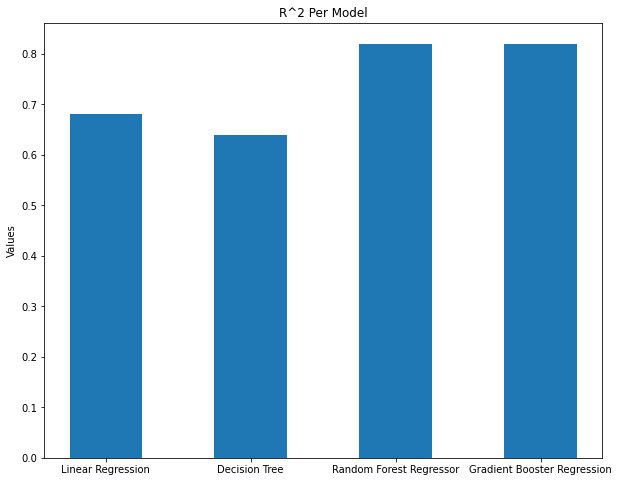

In [49]:
plt.rcParams["figure.figsize"] = (10,8)
labels = ['Linear Regression', 'Decision Tree', 'Random Forest Regressor', 'Gradient Booster Regression']
values = [0.68, 0.64, 0.82, 0.82]
x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x, height=values, width=0.5)
ax.set_ylabel('Values')
ax.set_title('R^2 Per Model')
ax.set_xticks(x, labels)
plt.show()

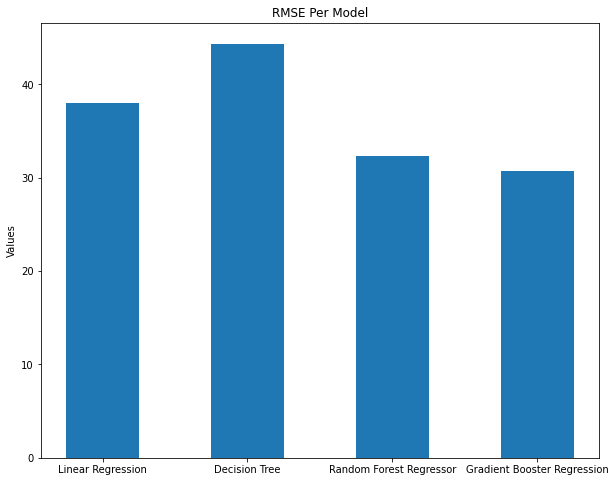

In [50]:
plt.rcParams["figure.figsize"] = (10,8)
labels = ['Linear Regression', 'Decision Tree', 'Random Forest Regressor', 'Gradient Booster Regression']
values = [38.03, 44.36, 32.34, 30.73]
x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x, height=values, width=0.5)
ax.set_ylabel('Values')
ax.set_title('RMSE Per Model')
ax.set_xticks(x, labels)
plt.show()